## Import Functions

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.segmentation import slic
from skimage.color import label2rgb, rgb2lab, rgb2hsv

import os


In [ ]:
# update your path here
cwd = "/path/to/your/directory"
os.chdir(cwd)

## Functions Used in the Code

In [47]:
def apply_slic(image, color_scheme):
    image = image.copy()
    
    rgb_image = cv2.cvtColor(image, color_scheme)
    segments = slic(rgb_image, n_segments=2, compactness=10)
    
    # Find the label of the middle segment (assuming there are only two segments)
    unique_labels, label_counts = np.unique(segments, return_counts=True)
    middle_segment_label = unique_labels[np.argmax(label_counts)]
    
    try:
        # Find the coordinates of the bounding box for the middle segment
        rows, cols = np.where(segments == 1)
        s1x1, s1y1 = min(cols), min(rows)
        s1x2, s1y2 = max(cols), max(rows)

        # Find the coordinates of the bounding box for the middle segment
        rows, cols = np.where(segments == 2)
        s2x1, s2y1 = min(cols), min(rows)
        s2x2, s2y2 = max(cols), max(rows)
    except Exception as e:
        cropped_image = image
    else:
        # Crop the image based on the bounding box
        if s1x1 > s2x1 :
            cropped_image = image[s1y1:s1y2, s1x1:s1x2]
        else :
            cropped_image = image[s2y1:s2y2, s2x1:s2x2]
    return cropped_image

In [53]:
def read_images_from_dir(directory_path, color_scheme):
    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Directory not found: {directory_path}")
        return

    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):  # Change the file formats if you have more - ideally jpg is what we have 
            image_path = os.path.join(directory_path, filename)
            print(image_path)
            read_img = cv2.imread(image_path,cv2.IMREAD_COLOR) 
            seg_img = apply_slic(read_img,color_scheme)             
            # Create a new figure for displaying the images side by side
            plt.figure(figsize=(12, 4))

            # Display the original image on the left side
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis('off')

            # Display the segmented image on the right side
            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(seg_img, cv2.COLOR_BGR2RGB) )
            plt.title("SLIC Segmentation (Segments=2)")
            plt.axis('off')

            # Show the images side by side
            plt.tight_layout()
            plt.show() 
            
            
            

## Call The Functions

Crop_Images\img1.jpg


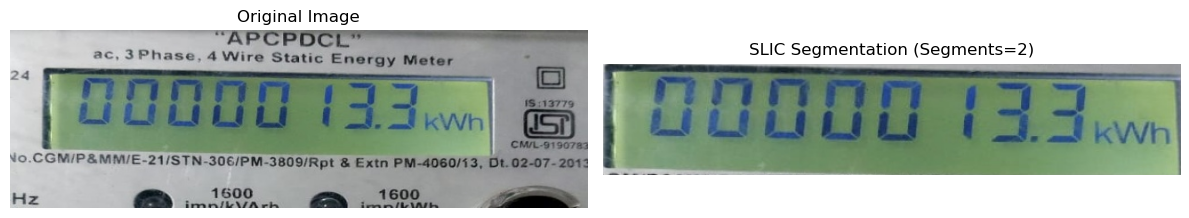

Crop_Images\img10.jpg


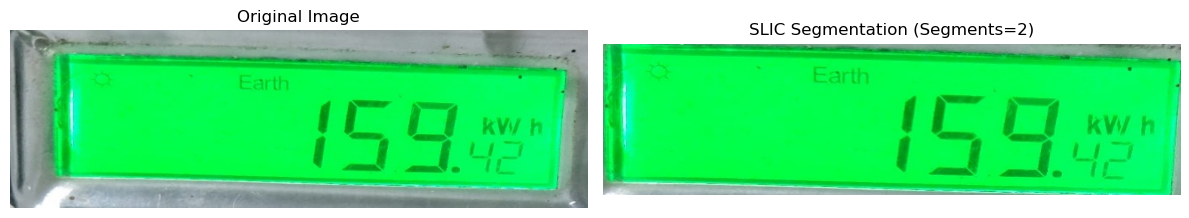

Crop_Images\img11.jpg


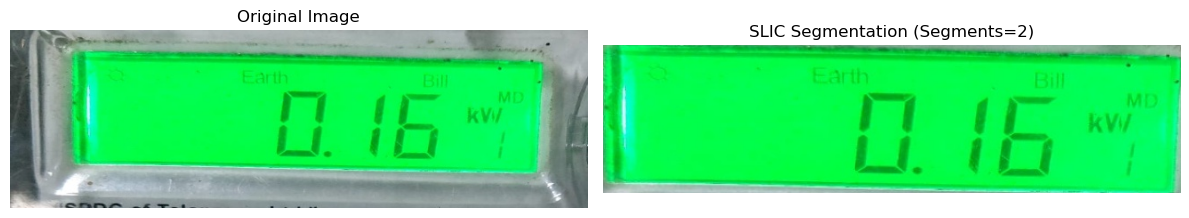

Crop_Images\img12.jpg


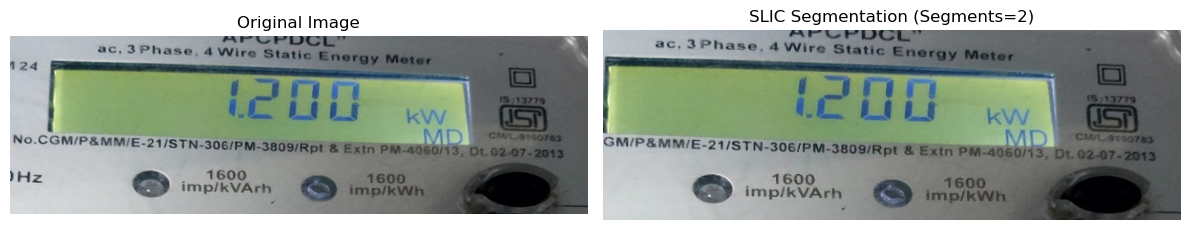

Crop_Images\img13.jpg


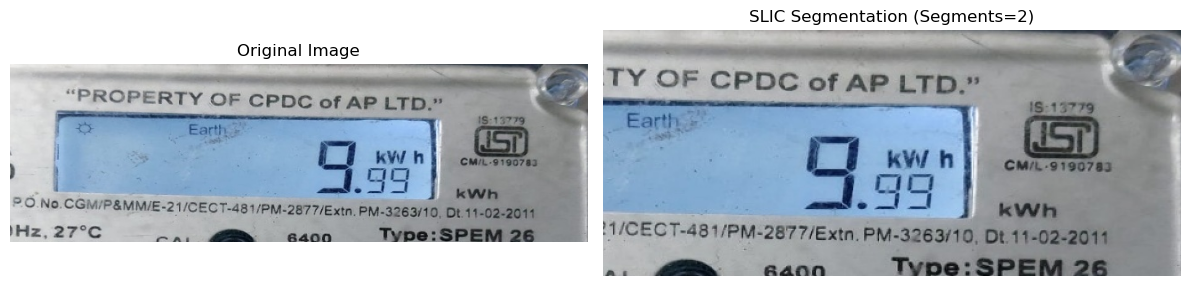

Crop_Images\img14.jpg


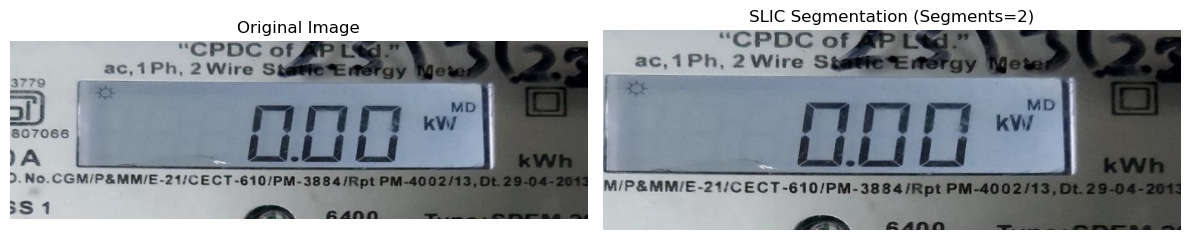

Crop_Images\img15.jpg


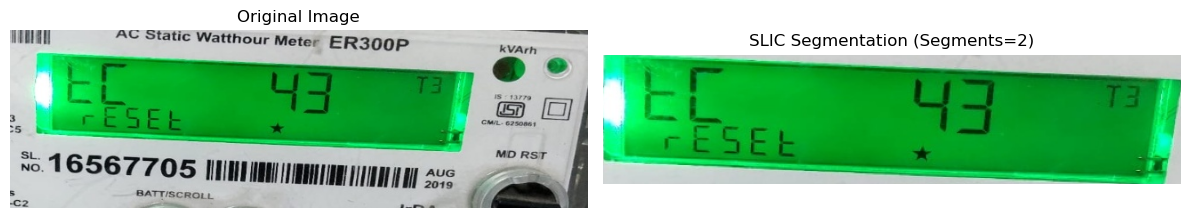

Crop_Images\img16.jpg


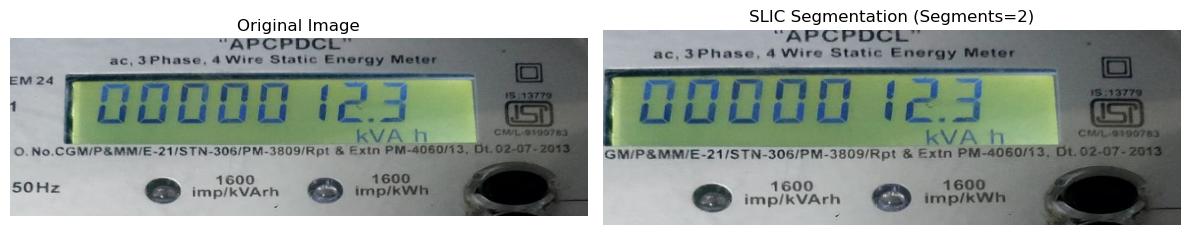

Crop_Images\img2.jpg


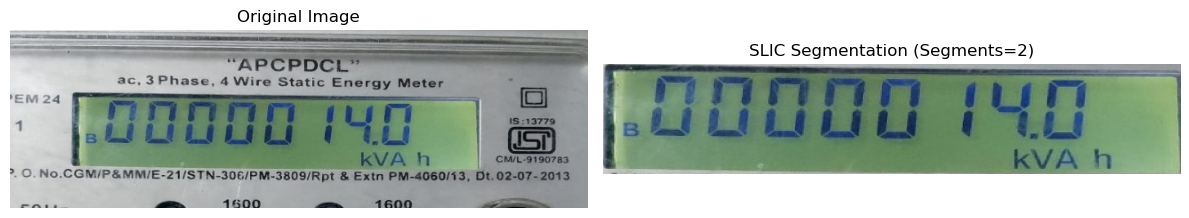

Crop_Images\img3.jpg


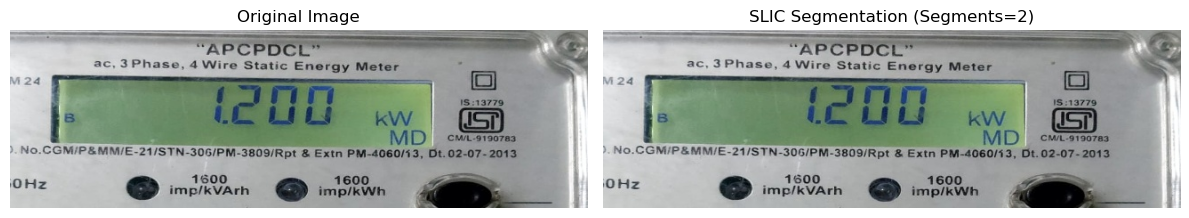

Crop_Images\img4.jpg


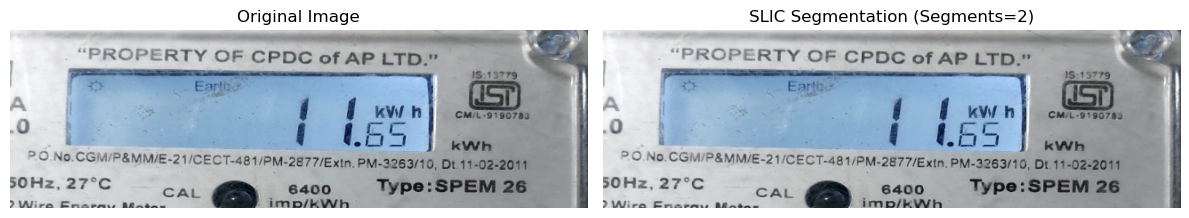

Crop_Images\img5.jpg


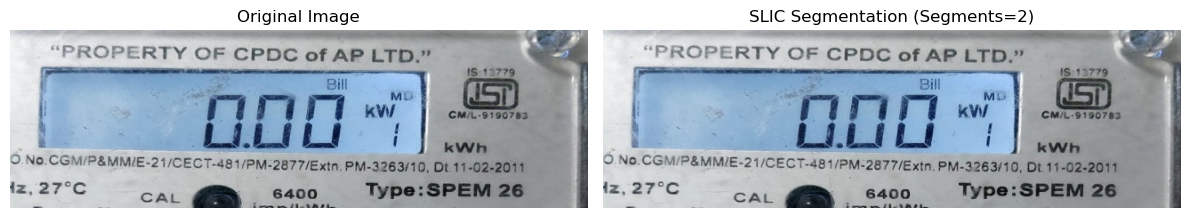

Crop_Images\img6.jpg


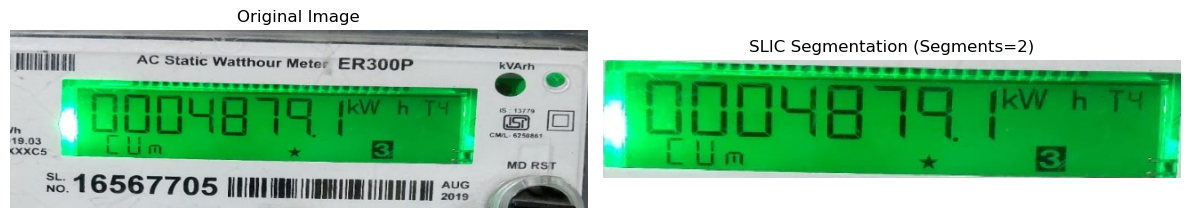

Crop_Images\img7.jpg


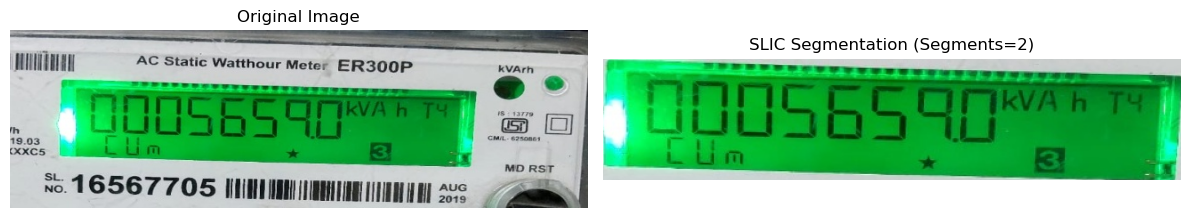

Crop_Images\img8.jpg


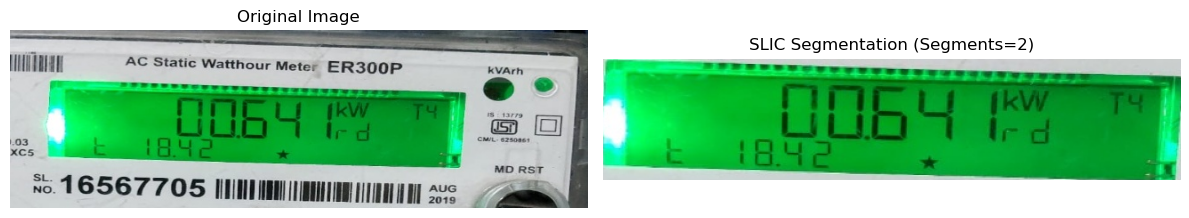

Crop_Images\img9.jpg


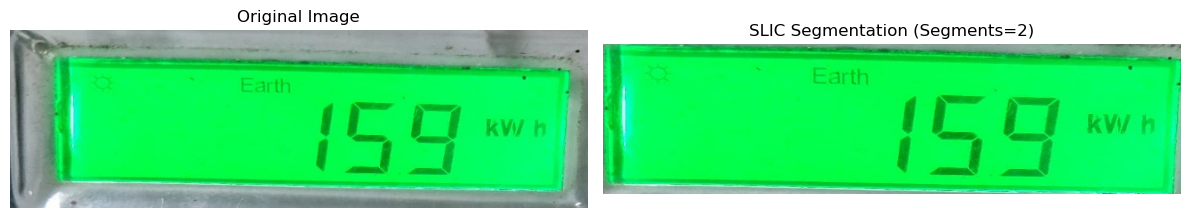

In [54]:
image_directory = 'Crop_Images'
read_images_from_dir(image_directory,cv2.COLOR_BGR2RGB)

## Helping Code to Shorten/Crop the image from Full Meter Picture to a hypothetical square box 


In [88]:
def reshape_img(image,height, width):
    img_tmp = image.copy()
    img_tmp = cv2.resize(img_tmp,(width,height))
    return img_tmp

def crop_rect(image, x, y, crop_height, crop_width, outfile):
    img_tmp = image.copy()
    img_tmp = img_tmp[y:y + crop_height, x:x + crop_width]
    
        
    plt.imshow(img_tmp)
    cv2.imwrite('./crop_image/'+ outfile, img_tmp)
    return img_tmp


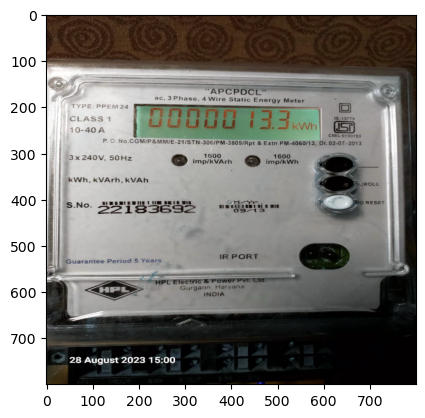

In [89]:
# Code used in cropping the images 

# Give the file name and change the path as appropriate
filename = 'img1.jpg'
temp1 = cv2.imread('./full_image/'+filename,cv2.IMREAD_COLOR)

# Beforing cropping wanted to reshape the image so that every picture looks in same size 
temp = reshape_img(temp1,800,800)
plt.imshow(temp)



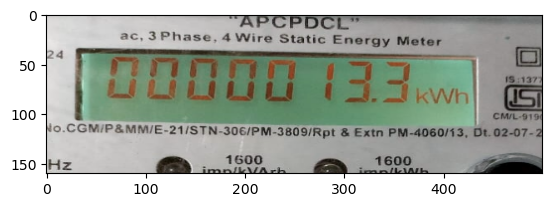

In [90]:
# Now Look for X and Y  Cordinates (in the above image) 
# For example - I want to crop the image from 200 (y axis) and 160 x axis 
# Check the X and Y Cordinates and Finalise it the run the below function 

# Based on observation update the X and Y Values - 
x = 160
y = 160
img_crp = crop_rect(temp, y, x, 160, 500, filename)
plt.imshow(img_crp)